### **Dataset**

In this homework, we will use the Students Performance in 2024 JAMB dataset from Kaggle.

In [1]:
!wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

--2024-11-09 21:32:12--  https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv [following]
--2024-11-09 21:32:14--  https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391501 (382K) [text/plain]
Saving to: 'jamb_exam_results.csv'

     0K .......... .......... .......... .......... .......... 13% 46.6K 7s
    50K .......... .......... .......... .......... 

The goal of this homework is to create a regression model for predicting the performance of students on a standardized test (column 'JAMB_Score').

### **Preparing the dataset**

In [8]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('jamb_exam_results.csv')
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Student_ID                    5000 non-null   int64  
 12  Age                           5000 non-null   int64  
 13  Gen

First, let's make the names lowercase

In [6]:
df.columns = df.columns.str.lower()
df.columns

Index(['jamb_score', 'study_hours_per_week', 'attendance_rate',
       'teacher_quality', 'distance_to_school', 'school_type',
       'school_location', 'extra_tutorials', 'access_to_learning_materials',
       'parent_involvement', 'it_knowledge', 'student_id', 'age', 'gender',
       'socioeconomic_status', 'parent_education_level',
       'assignments_completed'],
      dtype='object')

Preparation:

- Remove the student_id column.
- Fill missing values with zeros.
- Do train/validation/test split with 60%/20%/20% distribution.
- Use the train_test_split function and set the random_state parameter to 1.
- Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [7]:
df = df.drop(columns='student_id')

In [9]:
df = df.fillna(0)

In [10]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

len(df_train), len(df_val), len(df_test), len(df)

(3000, 1000, 1000, 5000)

In [15]:
X_train = df_train.drop(columns='jamb_score')
X_val = df_val.drop(columns='jamb_score')
X_test = df_test.drop(columns='jamb_score')

y_train = df_train['jamb_score'].values
y_val = df_val['jamb_score'].values
y_test = df_test['jamb_score'].values

In [19]:
dict_train = X_train.to_dict(orient='records')
dict_val = X_val.to_dict(orient='records')
dict_test = X_test.to_dict(orient='records')

In [26]:
dv = DictVectorizer(sparse=True)
dv.fit(dict_train)

DictVectorizer()

In [27]:
X_train = dv.transform(dict_train)
X_val = dv.transform(dict_val)
X_test = dv.transform(dict_test)

### **Question 1**

Let's train a decision tree regressor to predict the jamb_score variable.

- Train a model with max_depth=1.

Which feature is used for splitting the data?

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [28]:
dt_model = DecisionTreeRegressor(max_depth=1)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [30]:
print(export_text(dt_model, feature_names=dv.get_feature_names_out()))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



In [31]:
print("Which feature is used for splitting the data: study_hours_per_week")

Which feature is used for splitting the data: study_hours_per_week


### **Question 2**

Train a random forest regressor with these parameters:

- n_estimators=10
- random_state=1
- n_jobs=-1 (optional - to make training faster)

What's the RMSE of this model on the validation data?

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [36]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [37]:
y_pred = rf_model.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)

print(f"The RMSE of the model on validation data: {rmse}")

The RMSE of the model on validation data: 42.13724207871227


### **Question 3**

Now let's experiment with the n_estimators parameter

- Try different values of this parameter from 10 to 200 with step 10.
- Set random_state to 1.
- Evaluate the model on the validation dataset.

After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

In [45]:
import matplotlib.pyplot as plt

In [47]:
n_estimators = [*range(10, 201, 10)]
scores = []

for n in n_estimators:
    rf_model = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_val)
    rmse = round(root_mean_squared_error(y_val, y_pred), 3)
    scores.append(rmse)

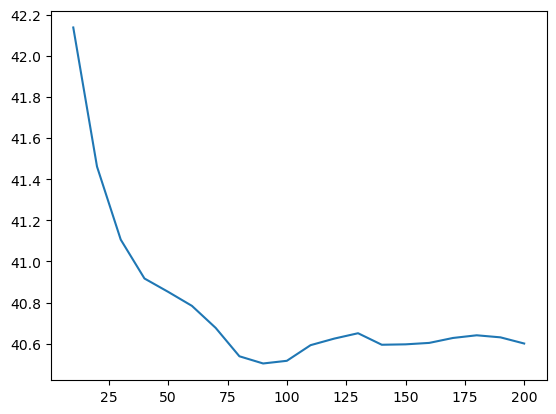

In [48]:
plt.plot(n_estimators, scores)

In [49]:
print(f"The RMSE stop improving after n_estimators=80")

The RMSE stop improving after n_estimators=80


### **Question 4**

Let's select the best max_depth:

- Try different values of max_depth: [10, 15, 20, 25]
- For each of these values, try different values of n_estimators from 10 till 200 (with step 10). calculate the mean RMSE
- Fix the random seed: random_state=1

What's the best max_depth, using the mean RMSE?

In [53]:
scores = []
max_depths = [10, 15, 20, 25]
n_estimators = [*range(10, 201, 10)]

for md in max_depths:
    for n in n_estimators:
        rf_model = RandomForestRegressor(n_estimators=n, max_depth=md, random_state=1, n_jobs=-1)
        rf_model.fit(X_train, y_train)

        y_pred = rf_model.predict(X_val)
        rmse = round(root_mean_squared_error(y_val, y_pred), 3)

        scores.append((n, md, rmse))

In [55]:
score_df = pd.DataFrame(scores, columns=["n_estimators", "max_depth", "rmse"])

In [56]:
score_df.groupby('max_depth')['rmse'].mean()

max_depth
10    40.39240
15    40.73535
20    40.73970
25    40.78785
Name: rmse, dtype: float64

In [57]:
import seaborn as sns

<Axes: xlabel='n_estimators', ylabel='rmse'>

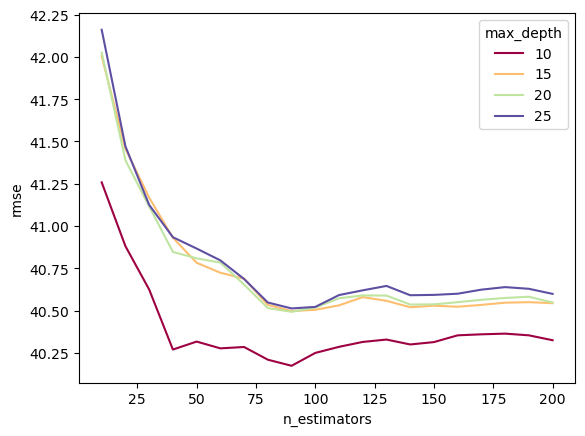

In [63]:
sns.lineplot(data=score_df, x='n_estimators', y='rmse', hue='max_depth', palette='Spectral')

In [64]:
print(f"The best max depth: 10")

The best max depth: 10


### **Question 5**

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

- Train the model with these parameters:
n_estimators=10,
max_depth=20,
random_state=1,
n_jobs=-1 (optional)
- Get the feature importance information from this model

What's the most important feature (among these 4)?

In [65]:
rf_model = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [82]:
feature_importances_df = pd.DataFrame(rf_model.feature_importances_, index=dv.get_feature_names_out(), columns=["Feature Importance"])


In [89]:
feature_importances_df.sort_values("Feature Importance", ascending=False).head(5)

,Feature Importance
study_hours_per_week,0.248354
attendance_rate,0.149729
distance_to_school,0.136486
teacher_quality,0.082682
age,0.069311


In [90]:
print(f"The most importance feature: study_hours_per_week")

The most importance feature: study_hours_per_week


### **Question 6**

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

- Install XGBoost
- Create DMatrix for train and validation
- Create a watchlist
- Train a model with these parameters for 100 rounds:

In [93]:
import xgboost as xgb

In [94]:
features = list(dv.get_feature_names_out())

dtrain = xgb.DMatrix(data=X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(data=X_val, label=y_val, feature_names=features)

In [95]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [96]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [98]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5,
                  evals=watchlist)

[0]	train-rmse:42.69384	val-rmse:44.89114
[5]	train-rmse:34.57756	val-rmse:40.69096
[10]	train-rmse:31.63404	val-rmse:40.48319
[15]	train-rmse:29.41497	val-rmse:40.86107
[20]	train-rmse:27.49658	val-rmse:41.27921
[25]	train-rmse:26.34353	val-rmse:41.57975
[30]	train-rmse:24.21076	val-rmse:41.72928
[35]	train-rmse:22.46394	val-rmse:42.03417
[40]	train-rmse:21.35340	val-rmse:42.24363
[45]	train-rmse:20.24355	val-rmse:42.27966
[50]	train-rmse:19.25157	val-rmse:42.43824
[55]	train-rmse:18.28398	val-rmse:42.54750
[60]	train-rmse:17.12178	val-rmse:42.64446
[65]	train-rmse:16.41573	val-rmse:42.77416
[70]	train-rmse:15.78314	val-rmse:42.84909
[75]	train-rmse:14.80007	val-rmse:43.00760
[80]	train-rmse:13.96907	val-rmse:43.08250
[85]	train-rmse:13.39102	val-rmse:43.16297
[90]	train-rmse:12.46485	val-rmse:43.25161
[95]	train-rmse:11.95568	val-rmse:43.37919
[99]	train-rmse:11.39140	val-rmse:43.41882


In [99]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [100]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5,
                  evals=watchlist)

[0]	train-rmse:45.49999	val-rmse:47.00533
[5]	train-rmse:40.17514	val-rmse:43.11181
[10]	train-rmse:37.07490	val-rmse:41.39235
[15]	train-rmse:35.08521	val-rmse:40.61341
[20]	train-rmse:33.67389	val-rmse:40.25010
[25]	train-rmse:32.55850	val-rmse:40.12003
[30]	train-rmse:31.76039	val-rmse:40.13806
[35]	train-rmse:31.01425	val-rmse:40.16103
[40]	train-rmse:30.13427	val-rmse:40.17753
[45]	train-rmse:29.49040	val-rmse:40.27366
[50]	train-rmse:28.75947	val-rmse:40.29573
[55]	train-rmse:28.17535	val-rmse:40.40072
[60]	train-rmse:27.77264	val-rmse:40.47477
[65]	train-rmse:27.10119	val-rmse:40.47659
[70]	train-rmse:26.61847	val-rmse:40.55225
[75]	train-rmse:26.21281	val-rmse:40.62564
[80]	train-rmse:25.69135	val-rmse:40.61309
[85]	train-rmse:25.14363	val-rmse:40.66530
[90]	train-rmse:24.60413	val-rmse:40.84708
[95]	train-rmse:24.03404	val-rmse:40.99952
[99]	train-rmse:23.59704	val-rmse:41.05034


In [101]:
print("ETA=0.1 gives the best RMSE")

ETA=0.1 gives the best RMSE
